<a href="https://colab.research.google.com/github/rootyJeon/DeepLearningExercise/blob/main/MLP_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(60000, 28, 28) (60000,)
(9, 28, 28)
W/B shapes
W1/B1 : (784, 64)/(64,)
W2/B2 : (64, 32)/(32,)
W3/B3 : (32, 10)/(10,)


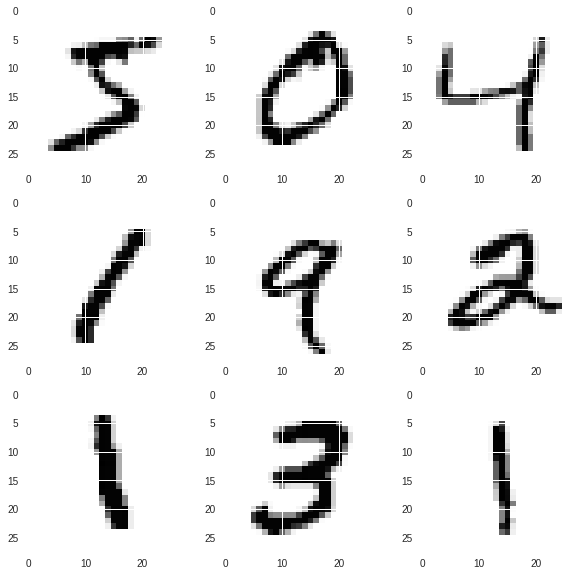

In [58]:
import numpy as np
from numpy.random import normal
from numpy import zeros

from termcolor import colored
import matplotlib.pyplot as plt
plt.style.use('seaborn')

from tensorflow.keras.datasets.mnist import load_data

(train_images, train_labels), test_ds = load_data()

print(type(train_images), type(train_labels))
print(train_images.shape, train_labels.shape)

view_images = train_images[:9, ...]
print(view_images.shape)
flg, axes = plt.subplots(3, 3, figsize=(10, 10))
for ax_idx, ax in enumerate(axes.flat):
  image = view_images[ax_idx]
  ax.imshow(image)


# set test env. -> parameter 설정
n_data = train_images.shape[0]
n_feature = train_images.shape[1] * train_images.shape[2]
b_size = 128
n_batch = n_data // b_size
epochs = 50
lr = 0.03
units = [64, 32, 10]

# initialize W, B -> Weight와 Bias 설정
W1 = normal(0, 1, (n_feature, units[0]))
B1 = zeros(units[0])

W2 = normal(0, 1, (units[0], units[1]))
B2 = zeros(units[1])

W3 = normal(0, 1, (units[1], units[2]))
B3 = zeros(units[2])

print(colored("W/B shapes", "green"))
print(f"W1/B1 : {W1.shape}/{B1.shape}")
print(f"W2/B2 : {W2.shape}/{B2.shape}")
print(f"W3/B3 : {W3.shape}/{B3.shape}")



In [65]:
losses, accs = list(), list() # loss 저장과 accuracy 저장
for epoch in range(epochs):
  n_correct, n_data = 0, 0 # n_correct는 acuuracy를 위함
  for b_idx in range(n_batch):
    # get mini-batch
    start_idx = b_idx * b_size
    end_idx = (b_idx + 1) * b_size # start_idx + b_size
    images = train_images[start_idx : end_idx, ...]
    
    X = images.reshape(b_size, -1) # flatten
    Y = train_labels[start_idx : end_idx]

    ### forward prop.
    # dense 1
    Z1 = X @ W1 + B1
    A1 = 1 / (1 + np.exp(-Z1))

    # dense 2
    Z2  = A1 @ W2 + B2
    A2 = 1 / (1 + np.exp(-Z2))

    # dense 3
    L = A2 @ W3 + B3

    # loss
    Pred = np.exp(L) / np.sum(np.exp(L), axis=1, keepdims=True)
    J = np.mean(-np.log(Pred[np.arange(b_size), Y])) # Pred에 indexing 한 다음에 log를 취하고 평균을 구하면 그게 바로 loss
    losses.append(J)

    # calculate accuracy
    Pred_label = np.argmax(Pred, axis=1)
    n_correct += np.sum(Pred_label == Y)
    n_data += b_size

    # back prop.
    labels = Y.copy()
    print(labels)
    Y = np.zeros_like(Pred)
    Y[np.arange(b_size), labels] = 1 # one-hot encoding
    print(Y)

    # loss
    dL = -1 / b_size * (Y - Pred)

    # dense 3
    dA2 = dL @ W3.T
    dW3 = A2.T @ dL
    dB3 = np.sum(dL, axis=0)

    # dense 2
    dZ2 = dA2 * A2*(1 - A2)
    dA1 = dZ2 @ W2.T
    dW2 = A1.T @ dZ2
    dB2 = np.sum(dZ2, axis=0)

    # dense 1
    dZ1 = dA1 * A1 * (1 - A1)
    dW1 = X.T @ dZ1
    dB1 = np.sum(dZ1, axis=0)

    # parameter update
    W3, B3 = W3 - lr * dW3, B3 - lr * dB3
    W2, B2 = W2 - lr * dW2, B2 - lr * dB2
    W1, B1 = W1 - lr * dW1, B1 - lr * dB1
    break
  # accs.append(n_correct / n_data)
  break


[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7 3 8 6 9 0 5 6
 0 7 6 1 8 7 9 3 9 8 5 9 3 3 0 7 4 9 8 0 9 4 1 4 4 6 0 4 5 6 1 0 0 1 7 1 6
 3 0 2 1 1 7 9 0 2 6 7 8 3 9 0 4 6 7 4 6 8 0 7 8 3 1 5 7 1 7 1 1 6 3 0 2 9
 3 1 1 0 4 9 2 0 0 2 0 2 7 1 8 6 4]
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in exp
  app.launch_new_instance()


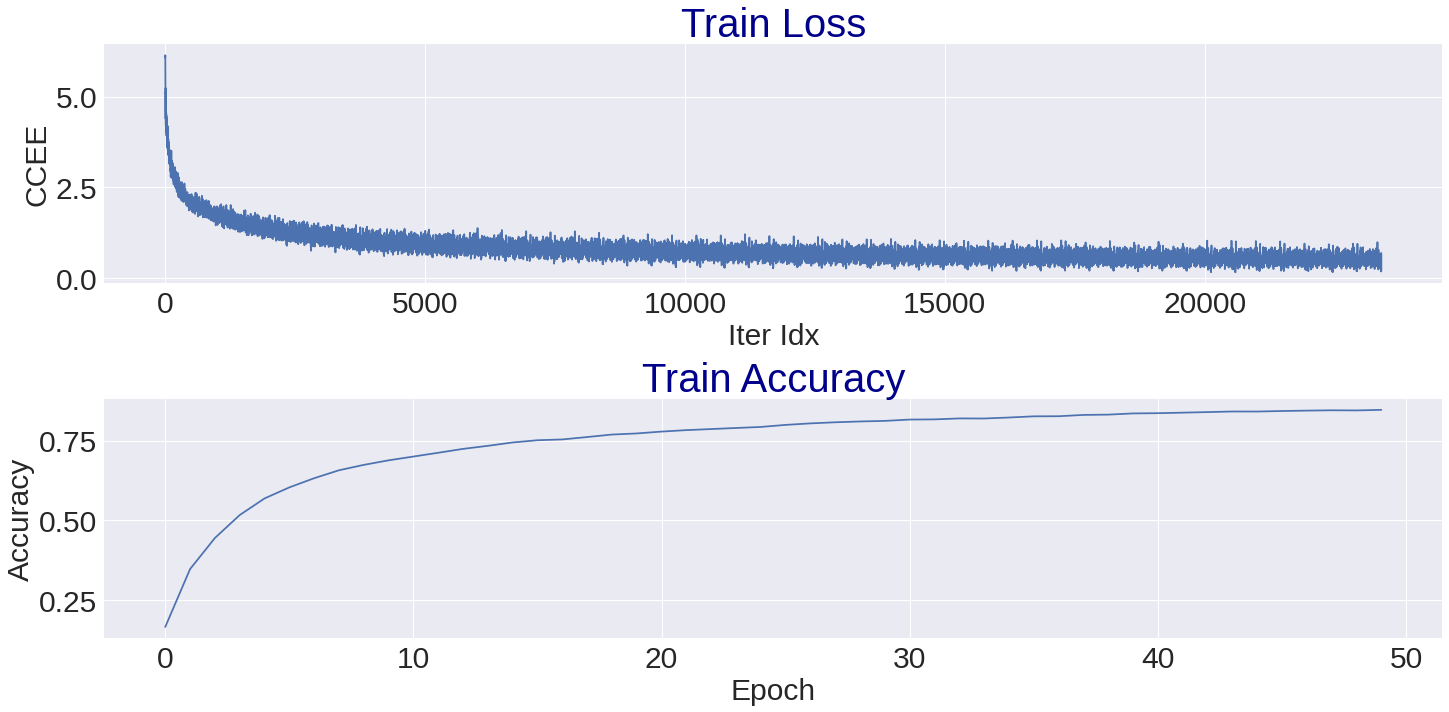

In [60]:
fig, axes = plt.subplots(2, 1, figsize=(20, 10))
axes[0].plot(losses)
axes[1].plot(accs)

axes[0].set_title('Train Loss', color='darkblue', fontsize=40)
axes[0].set_xlabel('Iter Idx', fontsize=30)
axes[0].set_ylabel('CCEE', fontsize=30)

axes[1].set_title("Train Accuracy", color='darkblue', fontsize=40)
axes[1].set_xlabel("Epoch", fontsize=30)
axes[1].set_ylabel("Accuracy", fontsize=30)

axes[0].tick_params(labelsize=30)
axes[1].tick_params(labelsize=30)

fig.tight_layout()